# Online Shopping Intention Analysis
(k-means clustering)

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

[Source link](https://thecleverprogrammer.com/2020/12/04/online-shopping-intention-analysis-with-python/)

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv("data/online_shoppers_intention.csv")
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Checking missing values

In [3]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Visualizing the `ProductRelated_Duration` and `BounceRates` columns

In [4]:
data.iloc[:, [5, 6]].describe()

,ProductRelated_Duration,BounceRates
count,12330.000000,12330.000000
mean,1194.746220,0.022191
std,1913.669288,0.048488
min,0.000000,0.000000
25%,184.137500,0.000000
50%,598.936905,0.003112
75%,1464.157214,0.016813
max,63973.522230,0.200000


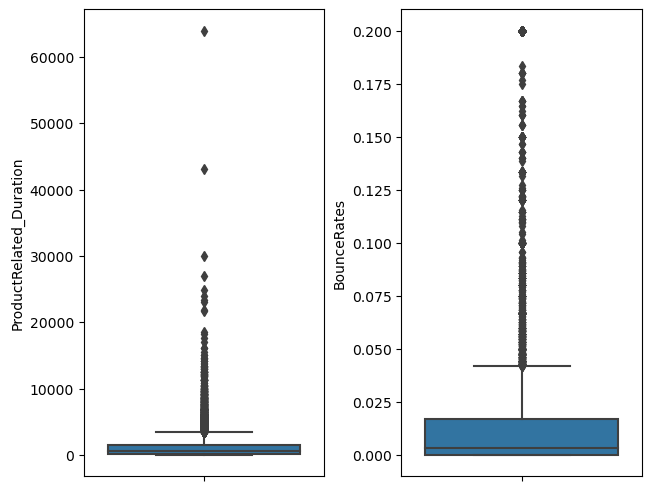

In [5]:
plt.figure(layout="constrained")
plt.subplot(1, 2, 1)
sns.boxplot(data, y="ProductRelated_Duration")
plt.subplot(1, 2, 2)
sns.boxplot(data, y="BounceRates");

**Result**: It seems that we should remove rows which have ProductRelated_Duration > 30000

In [6]:
dropped_rows = data[data["ProductRelated_Duration"] > 30000]
dropped_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


In [7]:
data = data.drop(index=dropped_rows.index)

### Visualizing again

In [8]:
data.iloc[:, [5, 6]].describe()

,ProductRelated_Duration,BounceRates
count,12328.000000,12328.000000
mean,1186.248875,0.022195
std,1788.852391,0.048492
min,0.000000,0.000000
25%,184.075000,0.000000
50%,598.828571,0.003112
75%,1463.850000,0.016830
max,29970.465970,0.200000


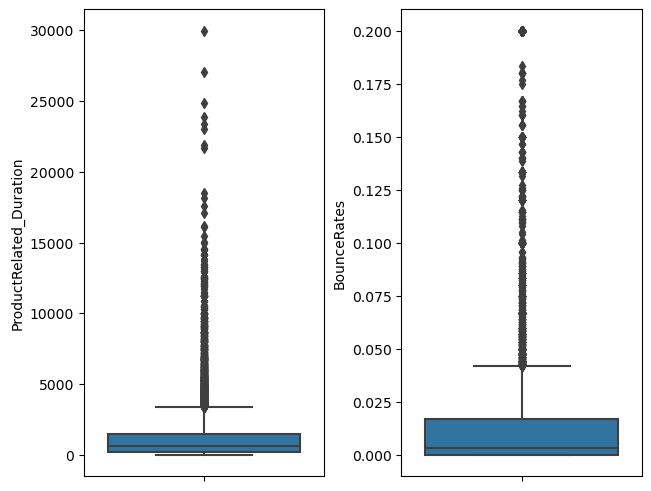

In [9]:
plt.figure(layout="constrained")
plt.subplot(1, 2, 1)
sns.boxplot(data, y="ProductRelated_Duration")
plt.subplot(1, 2, 2)
sns.boxplot(data, y="BounceRates");

### Selecting the `ProductRelated_Duration` and `BounceRates` columns

In [10]:
selected_features = data.iloc[:, [5, 6]]
selected_features.head()

,ProductRelated_Duration,BounceRates
0,0.000000,0.20
1,64.000000,0.00
2,0.000000,0.20
3,2.666667,0.05
4,627.500000,0.02


## Matrix of features

In [11]:
X = selected_features.values

print(f"X {X.shape}")

X (12328, 2)


## Elbow Method
Apply the K-elbow method to determine the number of clustering groups:

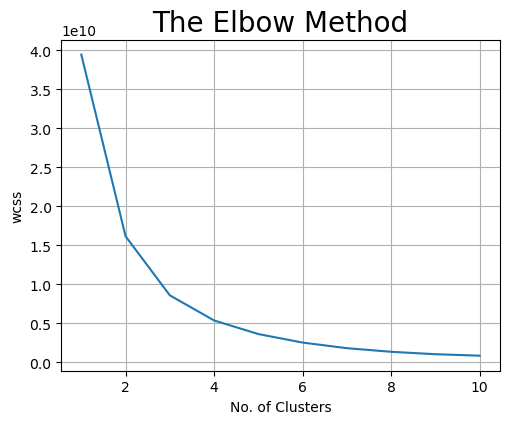

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, n_init=10, random_state=0, tol=0.001,
    )
    km.fit(X)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

**Result:** The number of optimal clustering groups for the duration of the product and the bounce rates is 2.

## K-means Clustering model with `k=2`

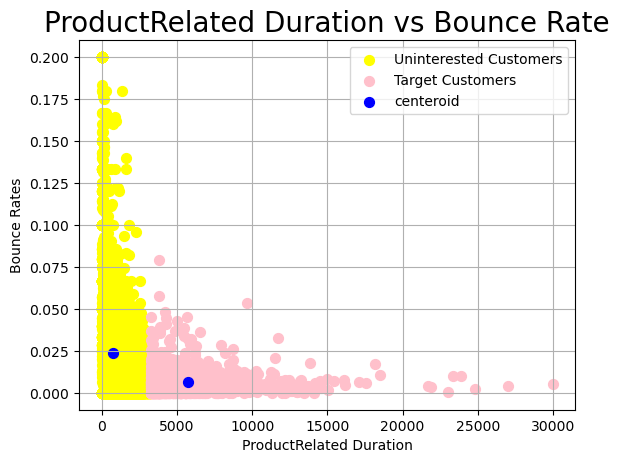

In [13]:
km = KMeans(n_clusters=2, n_init=10, random_state=0)

y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=50, c="yellow", label="Uninterested Customers")
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=50, c="pink", label="Target Customers")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=50, c="blue", label="centeroid")

plt.title("ProductRelated Duration vs Bounce Rate", fontsize=20)
plt.xlabel("ProductRelated Duration")
plt.ylabel("Bounce Rates")
plt.grid()
plt.legend()
plt.show()

**Result**: Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

## Evaluating the model (with classification matrix)

We can compare the result of clustering model with the values of `Revenue` column.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data["Revenue"])
labels_pred = y_means


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10420
           1       0.29      0.16      0.21      1908

    accuracy                           0.81     12328
   macro avg       0.58      0.54      0.55     12328
weighted avg       0.77      0.81      0.79     12328



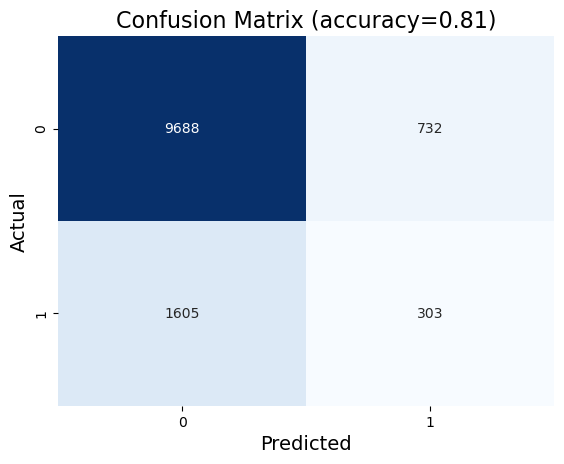

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(labels_true, labels_pred)
report = classification_report(labels_true, labels_pred)
accuracy = accuracy_score(labels_true, labels_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

**Result:** It is clear that we have poorly bundled many successful revenue sessions as uninterested customers, which means when the high bounce rate combined with a short product-related page duration, there are still a lot of customers. targets.